<a href="https://colab.research.google.com/github/gotham23/Tubes1/blob/main/Tubes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Analysis for MRI-Based Brain Tumor Classification
# Using VGG16


 1. Anggota 1 : 201810370311406, Kecerdasan Buatan I
 2. Anggota 2 : 201810370311408, Kecerdasan Buatan I



# Inisialisasi Dataset

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import os
train_dir = "/content/drive/MyDrive/dataset/Training"
val_dir = "/content/drive/MyDrive/dataset/Testing"

# yes adalah pengidap tumor otak
# no adalah bukan pengidap tumor otak

yes_train_path = train_dir + '/meningioma_tumor'
no_train_path = train_dir + '/no_tumor'
yes_val_path = val_dir + '/meningioma_tumor'
no_val_path = val_dir + '/no_tumor'

yes_len_train = len(os.listdir(yes_train_path))
no_len_train = len(os.listdir(no_train_path))
yes_len_val = len(os.listdir(yes_val_path))
no_len_val = len(os.listdir(no_val_path))

print("Jumlah dataset Training : ", yes_len_train + no_len_train)
print("Jumlah dataset Validasi : ", yes_len_val + no_len_val)
print("Jumlah train kelas pengidap tumor : ", yes_len_train)
print("Jumlah train kelas tidak mengidap tumor : ", no_len_train)
print("Jumlah validasi kelas pengidap tumor : ", yes_len_val)
print("Jumlah validasi kelas tidak mengidap tumor : ", no_len_val)

Jumlah dataset Training :  1217
Jumlah dataset Validasi :  220
Jumlah train kelas pengidap tumor :  822
Jumlah train kelas tidak mengidap tumor :  395
Jumlah validasi kelas pengidap tumor :  115
Jumlah validasi kelas tidak mengidap tumor :  105


# Menampilkan foto dalam bentuk list

In [168]:
train_yes_fname = os.listdir( yes_train_path )
train_no_fname = os.listdir( no_train_path )

print(train_yes_fname)
print(train_no_fname)

['m (151).jpg', 'm (143).jpg', 'm (15).jpg', 'm (142).jpg', 'm (141).jpg', 'm (136).jpg', 'm (135).jpg', 'm (134).jpg', 'm (140).jpg', 'm (14).jpg', 'm (133).jpg', 'm (131).jpg', 'm (132).jpg', 'm (138).jpg', 'm (139).jpg', 'm (130).jpg', 'm (137).jpg', 'm (13).jpg', 'm (128).jpg', 'm (125).jpg', 'm (124).jpg', 'm (129).jpg', 'm (127).jpg', 'm (123).jpg', 'm (122).jpg', 'm (121).jpg', 'm (120).jpg', 'm (126).jpg', 'm (119).jpg', 'm (12).jpg', 'm (118).jpg', 'm (117).jpg', 'm (112).jpg', 'm (111).jpg', 'm (114).jpg', 'm (116).jpg', 'm (110).jpg', 'm (11).jpg', 'm (109).jpg', 'm (108).jpg', 'm (115).jpg', 'm (107).jpg', 'm (113).jpg', 'm (106).jpg', 'm (105).jpg', 'm (104).jpg', 'm (100).jpg', 'm (10).jpg', 'm (102).jpg', 'm (103).jpg', 'm (101).jpg', 'm (190).jpg', 'm (189).jpg', 'm (19).jpg', 'm (188).jpg', 'm (183).jpg', 'm (182).jpg', 'm (181).jpg', 'm (180).jpg', 'm (179).jpg', 'm (18).jpg', 'm (187).jpg', 'm (186).jpg', 'm (185).jpg', 'm (178).jpg', 'm (184).jpg', 'm (176).jpg', 'm

# Menampilkan foto dalam bentuk image

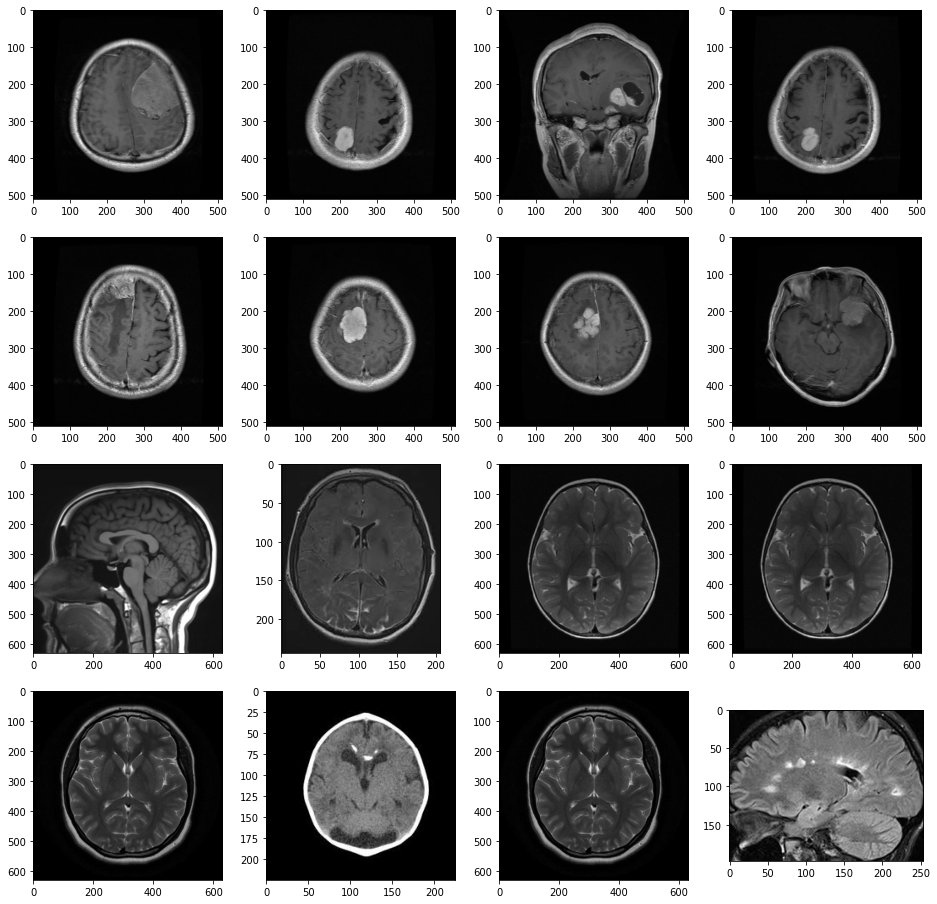

In [169]:
#menampilkan gambar kedua dataset
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pict_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pict_index+=8

next_yes_pix = [os.path.join(yes_train_path, fname) for fname in train_yes_fname[pict_index-8:pict_index]]
next_no_pix = [os.path.join(no_train_path, fname) for fname in train_no_fname[pict_index-8:pict_index]]

for i, img_path in enumerate(next_yes_pix + next_no_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Augmentasi

In [170]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [178]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


# Arsitektur

In [179]:



import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model



In [180]:


VGG16_base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', 
                                                 input_tensor=None, input_shape=(224, 224,3))
VGG16_base.trainable = False #pretrained tidak di latih ulang
output = VGG16_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(256,activation = "selu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) #menambah layer baru




In [181]:


model = Model(VGG16_base.input, output)

model.summary()



Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [182]:


#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', 
                        metrics =['accuracy'])



In [192]:


from keras.callbacks import ModelCheckpoint, EarlyStopping



In [184]:


history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=50,validation_data=validation_generator,
                              validation_steps=len(validation_generator)//32)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
4/4 [==============================] - 49s 12s/step - loss: 0.5859 - accuracy: 0.2625
Epoch 2/50
4/4 [==============================] - 42s 10s/step - loss: -0.4463 - accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 42s 10s/step - loss: -0.6802 - accuracy: 0.2750
Epoch 4/50
4/4 [==============================] - 42s 10s/step - loss: -0.2959 - accuracy: 0.3250
Epoch 5/50
4/4 [==============================] - 42s 10s/step - loss: -1.4811 - accuracy: 0.2750
Epoch 6/50
4/4 [==============================] - 43s 10s/step - loss: -2.9529 - accuracy: 0.4375
Epoch 7/50
4/4 [==============================] - 42s 10s/step - loss: -1.2405 - accuracy: 0.3500
Epoch 8/50
4/4 [==============================] - 42s 10s/step - loss: -3.2433 - accuracy: 0.3375
Epoch 9/50
4/4 [==============================] - 42s 10s/step - loss: -3.5937 - accuracy: 0.3875
Epoch 10/50
4/4 [==============================] - 42s 10s/step - loss: -3.4196 - accuracy: 0.4125
Epoch 11/50
4/4 [===

#Evaluasi

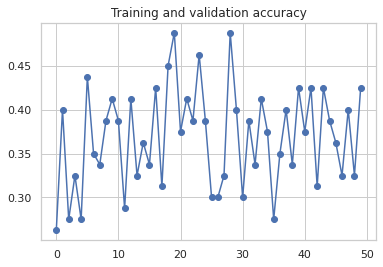

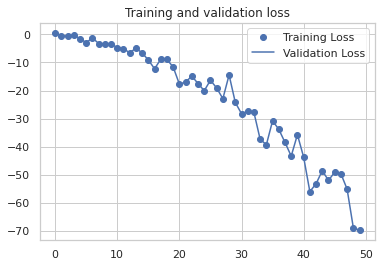

In [229]:


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




In [231]:



import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report, multilabel_confusion_matrix
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')




# Laporan klasifikasi

In [242]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                  precision    recall  f1-score   support

    glioma_tumor       0.30      0.28      0.29       100
meningioma_tumor       0.29      0.76      0.42       115
        no_tumor       0.00      0.00      0.00       105
 pituitary_tumor       0.00      0.00      0.00        74

        accuracy                           0.29       394
       macro avg       0.15      0.26      0.18       394
    weighted avg       0.16      0.29      0.20       394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
